In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from data_loader import *
import plotly.express as px

In [17]:
BASE = '../data'
utk = load_UTKFace_data(BASE+'/UTKFace')
utk['type'] = ['UTKFace']*len(utk)

agedb = load_AgeDB_data(BASE+'/AgeDB')
agedb['type'] = ['AgeDB']*len(agedb)

wiki = load_and_convert_WIKI_data(BASE+'/WIKI')
wiki['type'] = ['WIKI']*len(wiki)

imdb = load_and_convert_IMDB_data(BASE+'/IMDB')
imdb['type'] = ['IMDB']*len(imdb)

df = pd.concat([utk, agedb, wiki, imdb], ignore_index=True)
del utk, agedb, wiki, imdb

df = df[~df['age'].isna()]
df = df[df['age'] >= 0]
df = df[df['age'] <= 100]

In [18]:
IMDB_dict_age = df[df['type'] == 'IMDB']['age'].value_counts(normalize=True).to_dict()
UTK_dict_age = df[df['type'] == 'UTKFace']['age'].value_counts(normalize=True).to_dict()
AgeDB_dict_age = df[df['type'] == 'AgeDB']['age'].value_counts(normalize=True).to_dict()
WIKI_dict_age = df[df['type'] == 'WIKI']['age'].value_counts(normalize=True).to_dict()
combined_distribution = df['age'].value_counts(normalize=True).to_dict()

# Create a dataframe where each row is age and columns are dataset names
age_dist_df = pd.DataFrame({
    'UTKFace': UTK_dict_age,
    'AgeDB': AgeDB_dict_age,
    'WIKI': WIKI_dict_age,
    'IMDB': IMDB_dict_age,
    'Overall': combined_distribution
}).fillna(0).sort_index()

In [19]:
age_dist_df

,UTKFace,AgeDB,WIKI,IMDB,Overall
0,0.000000,0.000000,0.003002,0.000120,0.000423
1,0.047410,0.000061,0.000363,0.000124,0.002145
2,0.020349,0.000000,0.000198,0.000483,0.001277
3,0.012201,0.000485,0.000297,0.000152,0.000686
4,0.011525,0.000121,0.000297,0.000130,0.000629
...,...,...,...,...,...
96,0.000718,0.000121,0.000280,0.000033,0.000091
97,0.000000,0.000061,0.000313,0.000024,0.000055
98,0.000000,0.000121,0.000247,0.000002,0.000032
99,0.000380,0.000061,0.000330,0.000007,0.000059


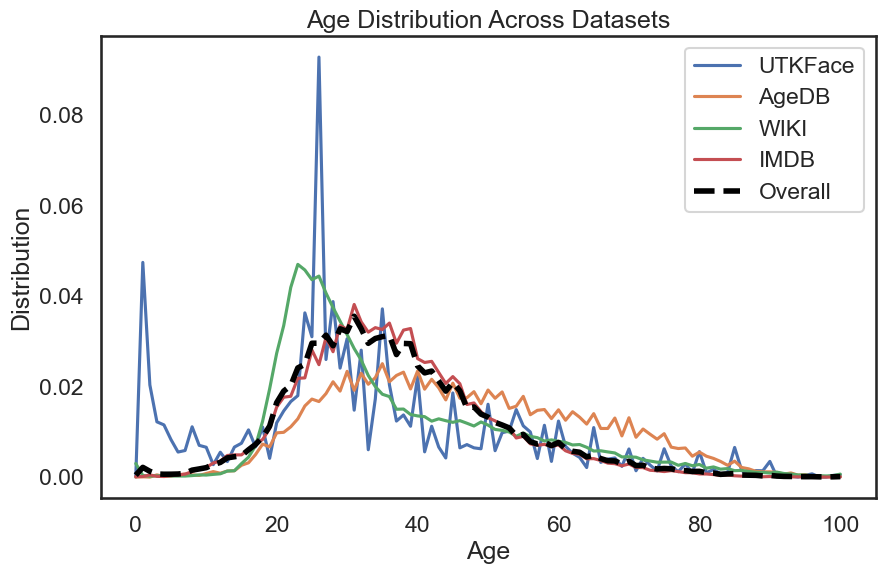

In [20]:
# Plot the line graph for age distribution
plt.figure(figsize=(10, 6))
for column in age_dist_df.columns:
    if column == 'Overall':
        plt.plot(age_dist_df.index, age_dist_df[column], label=column, linestyle='--', color='black', linewidth=4)
    else:
        plt.plot(age_dist_df.index, age_dist_df[column], label=column)

# Add title and labels
plt.title('Age Distribution Across Datasets')
plt.xlabel('Age')
plt.ylabel('Distribution')

# Add legend
plt.legend()

# Show plot
plt.show()

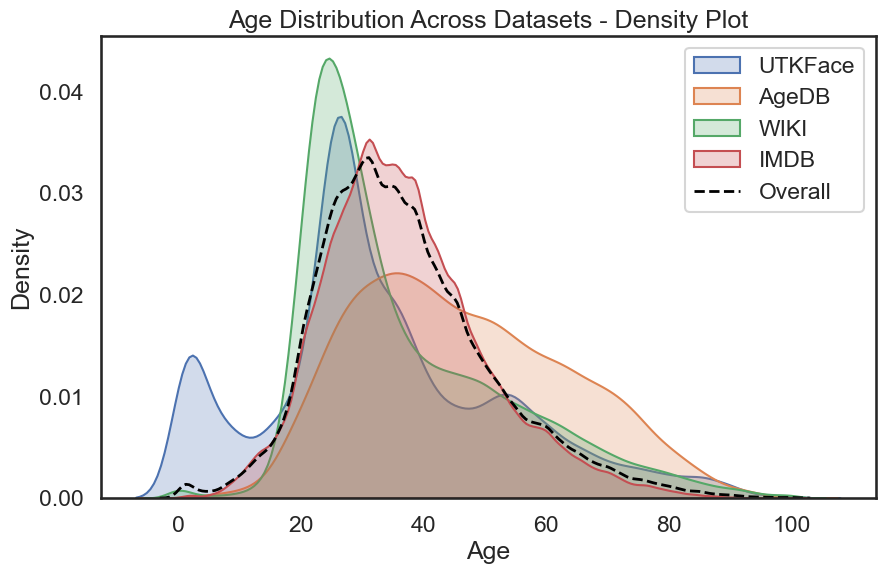

In [27]:
# Density Plot
plt.figure(figsize=(10, 6))
for column in age_dist_df.columns:
    sns.kdeplot(df[df['type'] == column]['age'], label=column, fill=True)
# Add the overall line
sns.kdeplot(df['age'], label='Overall', linestyle='--', color='black', linewidth=2, fill=False)
plt.title('Age Distribution Across Datasets - Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [46]:
# plot the gender distribution 
utk_gender = df[df['type'] == 'UTKFace']['gender'].value_counts(normalize=True).to_dict()
agedb_gender = df[df['type'] == 'AgeDB']['gender'].value_counts(normalize=True).to_dict()
wiki_gender = df[df['type'] == 'WIKI']['gender'].value_counts(normalize=True).to_dict()
imdb_gender = df[df['type'] == 'IMDB']['gender'].value_counts(normalize=True).to_dict()
overall_gender = df['gender'].value_counts(normalize=True).to_dict()

gender_dist_df = pd.DataFrame({
    'UTKFace': utk_gender,
    'AgeDB': agedb_gender,
    'WIKI': wiki_gender,
    'IMDB': imdb_gender,
    'Overall': overall_gender
}).fillna(0)
gender_dist_df.rename(index={0:'male', 1:'female'}, inplace=True)

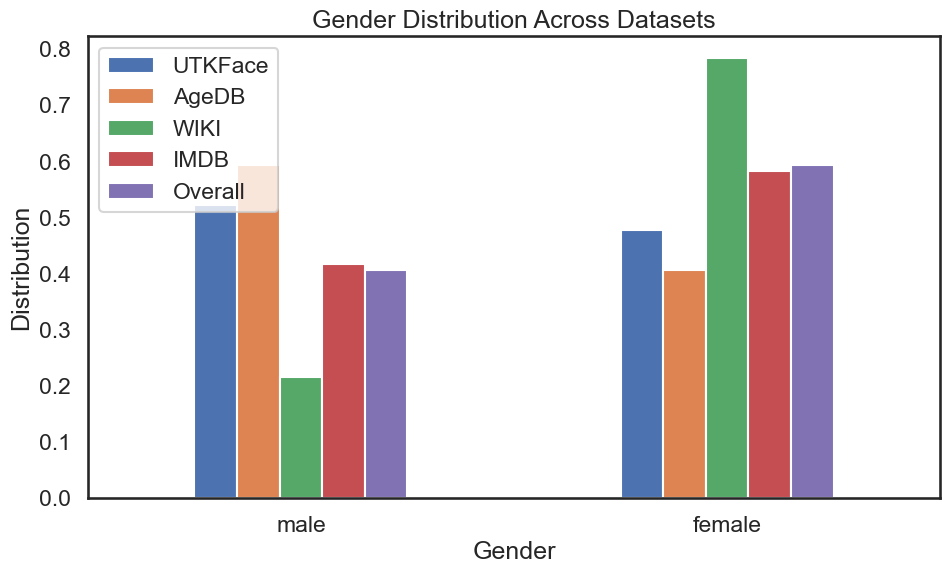

In [47]:
# plot the bar graph for gender distribution
gender_dist_df.plot.bar(stacked=False, figsize=(11, 6))
plt.title('Gender Distribution Across Datasets')
plt.xlabel('Gender')
plt.ylabel('Distribution')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()